In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [4]:
bank=pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\LOGISTIC REGRESSION\Book3.csv")

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.shape

(45211, 17)

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bankn=bank[['age','balance','duration','campaign','y']]

In [10]:
bankn.head()

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no


In [11]:
# Dividing our data into input and output variables 
X =bankn.iloc[:,:4]
y = bankn.iloc[:,-1]

In [12]:
X

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1
...,...,...,...,...
45206,51,825,977,3
45207,71,1729,456,2
45208,72,5715,1127,5
45209,57,668,508,4


In [13]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [14]:
y= bankn['y'].map({'no':0,'yes':1})

In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [16]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

Training Accuracy

In [18]:
#Predict for X dataset
y_pred_train = classifier.predict(X_train)

In [19]:
y_pred_train_df = pd.DataFrame({'actual': y_train,
                         'predicted_prob': y_pred_train})

In [20]:
y_pred_train_df

,actual,predicted_prob
13932,1,0
9894,0,0
39946,0,0
9217,0,0
4124,0,0
...,...,...
30403,0,0
21243,0,0
42613,1,0
43567,0,0


In [21]:
from sklearn.metrics import accuracy_score

print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),3)}')

Training-set accuracy score: 0.89


In [22]:
## Testing Accuracy

In [23]:
y_pred_test = classifier.predict(X_test)

In [24]:
y_pred_test_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': y_pred_test})

In [25]:
y_pred_test_df

,actual,predicted_prob
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,0
6654,0,0
17106,0,0
9025,1,0


In [26]:
acc_val = accuracy_score(y_test, y_pred_test)
acc_val_rounded = round(acc_val,3)

In [27]:
print(f'Testing-set accuracy score: {acc_val_rounded}')

Testing-set accuracy score: 0.888


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


Confusion matrix

 [[7856  124]
 [ 893  170]]

True Positives(TP) =  7856

True Negatives(TN) =  170

False Positives(FP) =  124

False Negatives(FN) =  893


<AxesSubplot:>

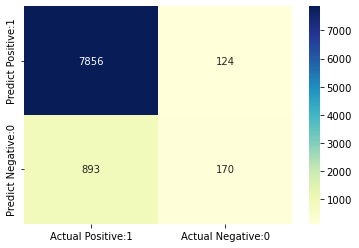

In [29]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


Classification Report

In [30]:
# print classification accuracy

classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Classification accuracy : {round(classification_accuracy,4)}')


Classification accuracy : 0.8875


In [31]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(f'Classification error : {round(classification_error,4)}')


Classification error : 0.1125


In [32]:
# print precision score

precision = TP / float(TP + FP)


print(f'Precision : {round(precision,4)}')

Precision : 0.9845


Recall or True Positive Rate

In [33]:
recall = TP / float(TP + FN)

print(f'Recall or Sensitivity : {round(recall,4)}')

Recall or Sensitivity : 0.8979


In [34]:
false_positive_rate = FP / float(FP + TN)


print(f'False Positive Rate : {round(false_positive_rate,4)}')


False Positive Rate : 0.4218


In [35]:
specificity = TN / (TN + FP)

print(f'Specificity : {round(specificity,4)}')


Specificity : 0.5782


In [36]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = classifier.predict_proba(X_test)

y_pred_prob

array([[0.9910627 , 0.0089373 ],
       [0.32792138, 0.67207862],
       [0.94013513, 0.05986487],
       ...,
       [0.96357573, 0.03642427],
       [0.51318612, 0.48681388],
       [0.91804117, 0.08195883]])

In [37]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Not term depositr (0)', 'Prob of - term deposite (1)'])

y_pred_prob_df

,Prob of - Not term depositr (0),Prob of - term deposite (1)
0,0.991063,0.008937
1,0.327921,0.672079
2,0.940135,0.059865
3,0.968578,0.031422
4,0.891457,0.108543
...,...,...
9038,0.692513,0.307487
9039,0.947736,0.052264
9040,0.963576,0.036424
9041,0.513186,0.486814


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.58      0.16      0.25      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [39]:
classifier.predict_proba(X_test)[0:10, 1]

array([0.0089373 , 0.67207862, 0.05986487, 0.03142179, 0.10854347,
       0.05907466, 0.07542847, 0.04508004, 0.05741633, 0.03277872])

In [40]:
classifier.predict_proba(X_test)

array([[0.9910627 , 0.0089373 ],
       [0.32792138, 0.67207862],
       [0.94013513, 0.05986487],
       ...,
       [0.96357573, 0.03642427],
       [0.51318612, 0.48681388],
       [0.91804117, 0.08195883]])

In [41]:


y_pred1 = classifier.predict_proba(X_test)[:,-1]
y_pred1

array([0.0089373 , 0.67207862, 0.05986487, ..., 0.03642427, 0.48681388,
       0.08195883])

In [42]:
# print the scores on training and test set

print(f'Training set score: {round(classifier.score(X_train, y_train),4)}')

print(f'Test set score: {round(classifier.score(X_test, y_test),4)}')


Training set score: 0.8895
Test set score: 0.8875


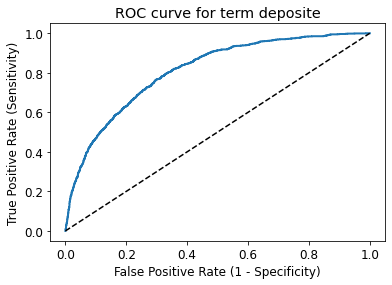

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for term deposite')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [48]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)

In [49]:
auc

0.8095209802493062